# Homework 2: Coding

**Due Monday September 28th, 11:59pm.**

**This assignment can be done individually or in groups of two**

**Submit hw2.ipynb to Gradescope (One per group and don't forget to add your partner's name)**

### Imports and Data

In [ ]:
"""
Import required libraries.

DON'T comment out these imports when submitting your final hw2.py file.
"""
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from numpy import linalg as LA
from numpy.linalg import inv

In [ ]:
"""
FOR COLAB USERS ONLY

Run the following code to upload and unzip the data into the Colab environment.

Please comment out *everything* in this cell (including the import) when submitting your .py file.
"""
from google.colab import files
uploaded = files.upload()
! unzip hw2_data.zip

Saving hw2_data.zip to hw2_data.zip
Archive:  hw2_data.zip
   creating: hw2_data/
   creating: hw2_data/hw2_data/
   creating: hw2_data/hw2_data/Data-set-1/
   creating: hw2_data/hw2_data/Data-set-1/Train-subsets/
  inflating: hw2_data/hw2_data/Data-set-1/Train-subsets/X_train_10_.txt  
  inflating: hw2_data/hw2_data/Data-set-1/Train-subsets/X_train_100_.txt  
  inflating: hw2_data/hw2_data/Data-set-1/Train-subsets/X_train_20_.txt  
  inflating: hw2_data/hw2_data/Data-set-1/Train-subsets/X_train_30_.txt  
  inflating: hw2_data/hw2_data/Data-set-1/Train-subsets/X_train_40_.txt  
  inflating: hw2_data/hw2_data/Data-set-1/Train-subsets/X_train_50_.txt  
  inflating: hw2_data/hw2_data/Data-set-1/Train-subsets/X_train_60_.txt  
  inflating: hw2_data/hw2_data/Data-set-1/Train-subsets/X_train_70_.txt  
  inflating: hw2_data/hw2_data/Data-set-1/Train-subsets/X_train_80_.txt  
  inflating: hw2_data/hw2_data/Data-set-1/Train-subsets/X_train_90_.txt  
  inflating: hw2_data/hw2_data/Data-set-1/Tra

## Q1: Least Squares Regression

Implement the following functions for question 1. Please **do not** use the sklearn implementation of linear regression or other imports beyond those listed above.

### L1 and L2 error

In [ ]:
def L2_error(y, y_hat):
    """
    L2 error loss
    
    Args:
    y ((n,1) np.array): actual labels
    y_hat ((n,1) np.array): estimated labels
    
    Returns:
        float: L2 error
    """
    L2_error = np.sum(np.square(y - y_hat)) / y.shape[0]
    return L2_error



def L1_error(y, y_hat):
    """
    L1 error loss
    
    Args:
    y ((n,1) np.array): actual labels
    y_hat ((n,1) np.array): estimated labels
    
    Returns:
        float: L1 error
    """
    L1_error = np.sum(np.absolute(y - y_hat)) / y.shape[0]
    
    return L1_error

### Least Square Regression

In [ ]:
def LinearRegression(train_data, train_labels):
    """
    Runs OLS on the given data.
    
    Args:
        train_data ((n,p) np.array): n is the number of training points and p the number of features
        train_labels ((n,1) np.array): training labels for the training data    
    
    Returns
        tuple: (w, b) where w is a (p,1) weight vector, and b the bias term     
    """

    # add feature at front
    nr = train_data.shape[0]

    const_row = np.ones((nr, 1))

    train_data = np.hstack((const_row, train_data)) # n,p + 1

    X_t = np.transpose(train_data) # n, p + 1
    w = inv(X_t@(train_data))@(X_t)@(train_labels) #( p + 1) x (p + 1) * p + 1 * n * n * 1 -> p + 1 * 1
    x_mean = np.mean(train_data, 0)
    b = (np.mean(train_labels) - x_mean@w) # n X (p + 1) * (p)
    # print(b)
    b = w[0,:]
    w = w[1:,:]
    return (w,b)

### Ridge Regression

In [ ]:
def LinearRegressionL2(train_data, train_labels, lambda_):
    """
    Runs linear regression with L2 regularization (ridge) on the given data.
    
    Args:
        train_data ((n,p) np.array): n is the number of training points and p the number of features
        train_labels ((n,1) np.array): training labels for the training data    
        lambda_  (float): scalar weighting the L2 penalty

    Returns
        tuple: (w, b) where w is a (p,1) weight vector, and b the bias term  
    """

    nr = train_data.shape[0]
    const_row = np.ones((nr, 1))

    train_data = np.hstack((const_row, train_data)) # n,p + 1

    X_t = np.transpose(train_data)
    p = train_data.shape[1]
    lambdai = lambda_ * np.identity(p)

    x_mean = np.mean(train_data, 0)
    w = inv(X_t@(train_data) + lambdai)@X_t@train_labels
    b = (np.mean(train_labels) - x_mean@w)
    b = w[0,:]

    w = w[1:,:]
    
    return (w,b)

### Q1.1.1: Learning Curve

Use your implementation of (unregularized) least squares regression to learn a regression model from 10$\%$ of the training data, then 20$\%$ of the training data, then 30$\%$ and so on up to 100$\%$ (separate files containing r$\%$ of the training examples are provided under the folder for this problem with file names **Data-set-1/Train-subsets/X$\_$train$\_$r$\%$.txt**, and the corresponding labels are provided with the file names **y$\_$train$\_$r$\%$.txt** in the same folder). In each case, measure both the $L_1$ and $L_2$ error on the training examples used, as well as the error on the given test set. Plot a curve showing both errors (on the *y-axis* as a function of the number of training examples used (on the *x-axis*).

Add the resulting curve to your Latex document.

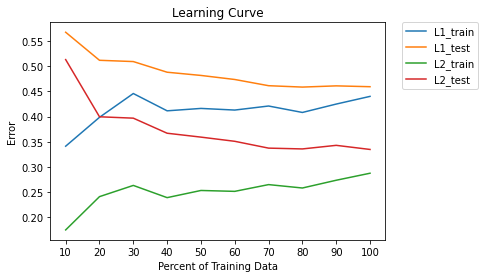

In [ ]:
"""
Please remember to comment out all code not contained within a function before 
submitting your file.
"""

X_test = pd.read_csv('/content/hw2_data/hw2_data/Data-set-1/X_test.txt', header=None).values
y_test = pd.read_csv('/content/hw2_data/hw2_data/Data-set-1/y_test.txt', header=None).values

#TODO your code here: Question 1.1.1.

L1_train_errors = [0] * 10
L2_train_errors = [0] * 10
L1_test_errors = [0] * 10
L2_test_errors = [0] * 10

for i in range(10):
    percent = int((i + 1) * 10)
    filename = "hw2_data/hw2_data/Data-set-1/Train-subsets/X_train_" + str(percent) + "_.txt"
    labelname = "hw2_data/hw2_data/Data-set-1/Train-subsets/y_train_" + str(percent) + "_.txt"
    # print(filename)
    x_small_test = pd.read_csv(filename, header=None).values
    y_small_label = pd.read_csv(labelname, header=None).values

    w,b = LinearRegression(x_small_test, y_small_label)
    # w,b = LinearRegressionL2(x_small_test, y_small_label, 5)

    y_predict = x_small_test.dot(w) + b
    L1_train_errors[i] = L1_error(y_small_label, y_predict)
    L2_train_errors[i] = L2_error(y_small_label, y_predict)

    y_test_predict = X_test.dot(w) + b
    L1_test_errors[i] = L1_error(y_test_predict, y_test)
    L2_test_errors[i] = L2_error(y_test_predict, y_test)



plt.plot(range(10),L1_train_errors, label ='L1_train')
plt.plot(range(10),L1_test_errors, label ='L1_test')
plt.plot(range(10),L2_train_errors, label = 'L2_train')
plt.plot(range(10),L2_test_errors, label = 'L2_test')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Learning Curve")
plt.xlabel("Percent of Training Data")
plt.xticks(range(10), range(10,101,10))
plt.ylabel("Error")
plt.show()

### Q1.1.2: Analysis of model learned from full training data

Write down the weight and bias terms, $\hat{w}$ and $\hat{b}$, learned from the full training data in your Latex document. Also, write down the $L_2$ training and test error of this model. In a single figure, draw a plot of the learned linear function (input instance on the *x-axis* and the predicted value on the *y-axis*), along with a scatter plot depicting the true label associated with each test instance.

Add the resulting plot to your Latex document.

w: 
[[-2.23442304]]
b: 
[1.16717388]
L2_test_errors: 
0.3347596869735334
L2_train_errors: 
0.2876339586619918


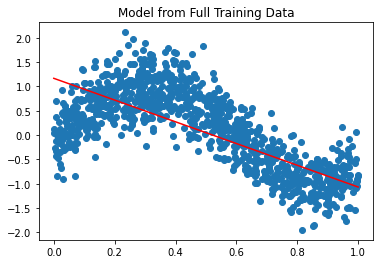

In [ ]:
"""
Please remember to comment out all code not contained within a function before 
submitting your file.
"""

X_test = pd.read_csv('/content/hw2_data/hw2_data/Data-set-1/X_test.txt', header=None).values
y_test = pd.read_csv('/content/hw2_data/hw2_data/Data-set-1/y_test.txt', header=None).values
X_train = pd.read_csv('/content/hw2_data/hw2_data/Data-set-1/X_train.txt',header=None).values
y_train = pd.read_csv('/content/hw2_data/hw2_data/Data-set-1/y_train.txt', header=None).values

w,b = LinearRegression(X_train, y_train)

#TODO your code here: Question 1.1.2.
print("w: \n" + str(w))
print("b: \n" + str(b))

print("L2_test_errors: \n" + str(L2_error(y_test, X_test.dot(w) + b)))
print("L2_train_errors: \n" + str(L2_error(y_train, X_train.dot(w) + b)))


x = np.linspace(0,1)
plt.plot(x,(x * w + b).T, color='red')
plt.scatter(X_test, y_test)
plt.title('Model from Full Training Data')
plt.show()

### Q1.2.1-2: Regression on different portions of training data

#### Regression on 5$\%$ of the training data. 
Use your implementation of $L_2$-regularized least squares regression to learn a model on 5$\%$ of the training data. Select the regularization parameter from the range $\{$0.1,1,10,50,100,150,200,500,1000,2500,5000$\}$ using 5-fold cross validation on the relevant training data. Draw a plot showing $\lambda$ on the *x-axis* and the training, test, and cross validation errors on the *y-axis* using the $L_2$ error. 

Then record the chosen value of $\lambda$ along with the weight vector, bias term, and all corresponding errors for the chosen value of $\lambda$.
        
#### Regression on 100$\%$ of the training data.

Repeat the above process, but instead learn from the full training data for $L_2$-regularized regression. Plot all of the errors, and record the chosen value of $\lambda$ along with the weight vector, bias term, and all corresponding errors for the chosen value of $\lambda$.

Add the resulting curves to your Latex document.

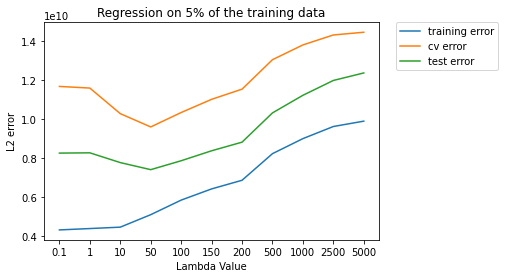

cv_error: 
[11666912140.425587, 11582957902.360575, 10273629736.28219, 9594652945.130398, 10332597964.743017, 11006836055.820835, 11528102328.389885, 13035051670.293373, 13790968588.03818, 14300152957.18968, 14439371230.98948]
test_error: 
[8255936497.914656, 8270167561.606681, 7770291365.616216, 7409012371.580251, 7864915599.539839, 8374668342.797168, 8815732406.262098, 10312894769.677258, 11213587808.636236, 11972355674.73379, 12357179923.154728]
train_error: 
[4325932832.396014, 4395779168.566407, 4467538400.740283, 5105768167.205793, 5851114217.924572, 6423921573.487231, 6866129295.607997, 8227702792.210438, 8997020034.15, 9616436495.45098, 9890565878.70046]
cv_error_ole: 
[8233681399.353473, 8233681399.353473, 8233681399.353473, 8233681399.353473, 8233681399.353473, 8233681399.353473, 8233681399.353473, 8233681399.353473, 8233681399.353473, 8233681399.353473, 8233681399.353473]
test_error_ole: 
[6551865327.657595, 6551865327.657595, 6551865327.657595, 6551865327.657595, 6551865327

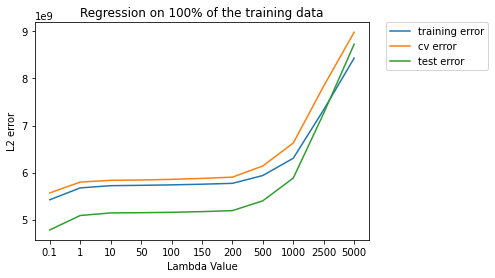

cv_error: 
[5566577227.134795, 5796118357.861247, 5834375988.81171, 5841252201.135811, 5854309023.196014, 5874844951.325416, 5901595884.451564, 6139858415.744233, 6627263789.908614, 7840454108.153941, 8983665703.536852]
test_error: 
[4779113710.38501, 5085917142.10758, 5140362023.070935, 5145521926.092962, 5153582075.375314, 5168390967.294122, 5189189156.542317, 5398537529.50063, 5882470572.6202545, 7261088883.824786, 8729560727.963617]
train_error: 
[5420387242.799575, 5672911090.822707, 5719931595.154094, 5727552702.241252, 5737206364.69285, 5751407891.79079, 5769682321.3064575, 5936632231.162081, 6304427852.632534, 7335736497.736451, 8434101073.891234]
cv_error_ole: 
[5306975417.872025, 5306975417.872025, 5306975417.872025, 5306975417.872025, 5306975417.872025, 5306975417.872025, 5306975417.872025, 5306975417.872025, 5306975417.872025, 5306975417.872025, 5306975417.872025]
test_error_ole: 
[4440306252.2278385, 4440306252.2278385, 4440306252.2278385, 4440306252.2278385, 4440306252.22

In [ ]:
"""
Please remember to comment out all code not contained within a function before 
submitting your file.
"""
for i in [5, 100]:
    lambda_ = [0.1,1,10,50,100,150,200,500,1000,2500,5000]
    train_error = [0]*11
    test_error = [0]*11
    cv_error = [0]*11
    cv_error_ole = [0]*11
    train_error_ole = [0]*11
    test_error_ole = [0]*11
    X_test = pd.read_csv('/content/hw2_data/hw2_data/Data-set-2/X_test',header=None).values
    y_test = pd.read_csv('/content/hw2_data/hw2_data/Data-set-2/y_test',header=None).values
    X_train = pd.read_csv('/content/hw2_data/hw2_data/Data-set-2/Train-subsets/X_train_'+str(i)+'.txt',header=None).values
    y_train = pd.read_csv('/content/hw2_data/hw2_data/Data-set-2/Train-subsets/y_train_'+str(i)+'.txt',header=None).values 
    
    indices = np.arange(X_train.shape[0])
    # print(indices)
    np.random.shuffle(indices)
    # print("shuttfledid: \n" + str(indices))
    cv_arrays = np.array_split(indices, 5)

    #TODO your code here: Question 1.2.1-2
    for j in range(11):

      cv_e = float("inf")
      w_model = 0
      b_model = 0

      w_model_ole = 0
      b_model_ole = 0
      for k in range(5):
        # take one fold out of 5
        X_cv = X_train[cv_arrays[k], :]
        y_cv = y_train[cv_arrays[k], :]
        
        # find the remaining data for trainning
        full_indices = np.arange(X_train.shape[0])
        train_indices = np.setdiff1d(full_indices, cv_arrays[k])
        # print("cvid: \n" + str(cv_arrays[k]))
        # print("trid: \n" + str(train_indices))

        # remove the cv data in train data
        X_train_test_removed = X_train[train_indices,:]
        y_train_test_removed = y_train[train_indices,:]

        # train the model
        w, b = LinearRegressionL2(X_train_test_removed, y_train_test_removed, lambda_[j])
        w_ole, b_ole = LinearRegression(X_train_test_removed, y_train_test_removed)

        # update the error
        cv_error[j] = cv_error[j] + L2_error(X_cv.dot(w) + b, y_cv) / 5
        cv_error_ole[j] = cv_error_ole[j] + L2_error(X_cv.dot(w_ole) + b_ole, y_cv) / 5


      # record train error and test error
      w_model, b_model = LinearRegressionL2(X_train, y_train, lambda_[j])
      train_error[j] = L2_error(X_train.dot(w_model) + b_model, y_train)
      test_error[j] = L2_error(X_test.dot(w_model) + b_model, y_test)

      #ole error
      w_model_ole, b_model_ole = LinearRegression(X_train, y_train)
      train_error_ole[j] = L2_error(X_train.dot(w_model_ole) + b_model_ole, y_train)
      test_error_ole[j] = L2_error(X_test.dot(w_model_ole) + b_model_ole, y_test)

    plt.plot(range(11), train_error, label='training error')
    plt.plot(range(11),cv_error, label = 'cv error')
    plt.plot(range(11), test_error, label = 'test error')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Regression on ' + str(i) + '% of the training data')
    plt.ylabel('L2 error')
    plt.xlabel('Lambda Value')
    plt.xticks(range(11), lambda_)
    plt.show()

    print("cv_error: \n" + str(cv_error))
    print("test_error: \n" + str(test_error))
    print("train_error: \n" + str(train_error))

    print("cv_error_ole: \n" + str(cv_error_ole))
    print("test_error_ole: \n" + str(test_error_ole))
    print("train_error_ole: \n" + str(train_error_ole))


TypeError: ignored

### Q1.2 Report on Latex
Answer the following questions on Latex in the respective section.

1.2.3 For each of the two training sets considered above (5$\%$ and 100$\%$), compare the training and test errors of the models learned using unregularized least squares regression and ridge regression. What can you conclude from this about the value of regularization for small and large training sets?

1.2.4 For each of the two training sets considered above (5$\%$ and 100$\%$), Which $\lambda$ should be larger by theory?why? Do those values align with the conclusion you made in part 1.3?


## Q2: Batch Gradient Descent


### Gradient Descent Linear Regression

In [ ]:
def LinearRegressionGD(train_data, train_labels, iters, learning_rate):
    """
    Args:
        train_data ((n,p) np.array): n is the number of training points and p the number of features
        train_labels ((n,1) np.array): training labels for the training data 
        iters (int): the number of iterations to run Gradient Descent
        learning_rate (float): the alpha value for gradient descent

    Returns
        tuple: (w, b) where w is a (p,1) weight vector, and b the bias term 
    """
    N = train_data.shape[0]
    p = train_data.shape[1] # number of feature

    w = np.zeros((p, 1))
    b = 0

    for i in range(iters): 
      costs = train_data.dot(w) + b - train_labels # all costs n, 1
      # n x m, n x 1 --> n x m
      # sum the weight and average -> update the new weights
      weight_avg = np.sum(train_data * costs, 0) / N # 1 x p 
      w = w - 2 * learning_rate * np.transpose(weight_avg)
      b = b - 2 * learning_rate * np.sum(costs, 0) / N

    
    return (w, b)

### Q2.1-2.2: OLS and Gradient Descent Runtime

2.1) Time  the  closed-form  unregularized  linear  regression  implementation  you  wrote  inprevious section on the full training data for Data Set 1.  Write down the weight and bias terms,  ˆwandˆb, learned from the full training data, as well as theL2error on the test data, and the time it took torun the full process.

2.2) Time the gradient descent implementation you just wrote on the full training data for Data Set 1 with iterations from range $\{$10, 100, 1000$\}$, and a learning rate of 0.01. Write down the weight and bias terms , $\hat{w}$ and $\hat{b}$, learned from the full training data in your Latex document, as well as the $L_2$ error on the test data, and the time it took to run the full process. 

In [ ]:
"""
Please remember to comment out all code not contained within a function before 
submitting your file.
"""

X_test = pd.read_csv('/content/hw2_data/hw2_data/Data-set-1/X_test.txt', header=None).values
y_test = pd.read_csv('/content/hw2_data/hw2_data/Data-set-1/y_test.txt', header=None).values
X_train = pd.read_csv('/content/hw2_data/hw2_data/Data-set-1/X_train.txt', header=None).values
y_train = pd.read_csv('/content/hw2_data/hw2_data/Data-set-1/y_train.txt', header=None).values

start = time.time()
(w,b) = LinearRegression(X_train, y_train)
y_test_pred = np.matmul(X_test, w) + b
y_train_pred = np.matmul(X_train, w) + b


# L2_error(y_test, y_test_pred)
print("--- OLS Closed Form ---")
print("W:", w.T, "B:", b)
print("L2 Training Error:", L2_error(y_train, y_train_pred))
print("L2 Test Error:", L2_error(y_test, y_test_pred))
print("Time:", time.time() - start)
print()

time_arr = [100,1000,2000]
for i in range(len(time_arr)):
  print(str(time_arr[i]) + " iterations")
  start = time.time()
  (w,b) = LinearRegressionGD(X_train, y_train, time_arr[i], .01)

  y_test_pred = np.matmul(X_test, w) + b
  y_train_pred = np.matmul(X_train, w) + b
  # #L2_error(y_test, y_test_pred)
  print("---  Gradient Descent ---")
  print("W:", w, "B:", b)
  print("L2 Training Error:", L2_error(y_train, y_train_pred))
  print("L2 Test Error:", L2_error(y_test, y_test_pred))
  print("Time:", time.time() - start)

--- OLS Closed Form ---
W: [[-2.23442304]] B: [1.16717388]
L2 Training Error: 0.2876339586619918
L2 Test Error: 0.3347596869735334
Time: 0.003926992416381836

100 iterations
---  Gradient Descent ---
W: [[-0.26961946]] B: [0.10995921]
L2 Training Error: 0.5911173532001397
L2 Test Error: 0.5897357152996778
Time: 0.008636236190795898
1000 iterations
---  Gradient Descent ---
W: [[-1.57947694]] B: [0.81379186]
L2 Training Error: 0.3213964163657431
L2 Test Error: 0.3484509604983921
Time: 0.053145647048950195
2000 iterations
---  Gradient Descent ---
W: [[-2.04105781]] B: [1.06284194]
L2 Training Error: 0.2905768871751107
L2 Test Error: 0.33135516029916695
Time: 0.1015324592590332


### Q2.3 Report on Latex
Answer the followings question on Latex in the respective section.

Which algorithm runs faster? Why might that be the case? Why would we ever use gradient descent linear regression in practice while a closed form solution exists?

## Turning it in


**Remember to recomment all script portions of this notebook before submitting (i.e. any code not in a function, excluding code that imports libraries). This is to ensure that the Autograder works properly. Also make sure you did not edit other sections of the code outside of specified areas.**

1. Download this notebook as a `hw2.ipynb` file with the functions implemented and the sandbox code commented out
  - If using Google Colab, go to "File -> Download .ipynb"
  - If using Jupyter locally, go to "File -> Download as -> Notebook (.ipynb)"
  
2. Submit `hw2.ipynb` file to Gradescope (you can do this as many times as you'd like before the deadline)